In [1]:
import csv
time=[]
acce=[]
posi=[]

In [2]:
with open('new-1-5.0sec.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        time.append(float(row[0]))
        acce.append(float(row[1]))
        posi.append(float(row[3]))

In [3]:
lp = len(posi)
NEDGE = 84

for i in range(lp):
    if posi[i] > 2.5:
        posi[i] = 1
    else:
        posi[i] = 0

edge = []
wedge = []
iedge = []
i = 0
for i in range(1,lp):
    if posi[i] ==1 and posi[i-1]==0:
        break
print(i)
k = 0
l = 0
for j in range(i+1,lp):
    if posi[j] != posi[j-1]:
        wedge.append(k)
        iedge.append(j)
        edge.append(l)
        k = 0
        l += 1
    else:
        k += 1
nedge = len(wedge)
ncycle = int(nedge/(NEDGE*2.0))
sumacce = 0
j = 0
for i in range(iedge[0],iedge[ncycle*NEDGE*2]):
    sumacce += acce[i]
    j += 1
sumacce /= float(j)
for i in range(lp):
    acce[i] -= sumacce

istart = 0
for i in range(1,nedge):
    if (wedge[i] > wedge[i-1]*3) and (acce[iedge[i]] > 0):
    #if (wedge[i] > wedge[i-1]*3):
        istart = i
        print('i = ',i)
        break
print ('istart = ',istart)

jstart = 0
k = 0
if istart > NEDGE:
    jstart = NEDGE - (istart - NEDGE)
    k = 0
else:
    jstart = istart - 1
    k = 1
print('jstart = ',jstart)
i = jstart
for l in range(nedge):
    edge[l] = i
    if k == 1:
        i -= 1
        if i < 0:
            i = 0
            k = 0
    else:
        i += 1
        if i >= NEDGE:
            i = NEDGE - 1
            k = 1
#print(posi)
print(iedge)
print(edge)
print(wedge)

1476
i =  82
istart =  82
jstart =  81
[1579, 1619, 1709, 1746, 1829, 1862, 1941, 1972, 2047, 2078, 2147, 2176, 2245, 2272, 2339, 2365, 2430, 2456, 2520, 2544, 2608, 2632, 2697, 2718, 2779, 2804, 2863, 2893, 2947, 2971, 3030, 3059, 3113, 3143, 3197, 3222, 3280, 3305, 3364, 3390, 3448, 3474, 3533, 3559, 3618, 3649, 3705, 3730, 3793, 3820, 3882, 3910, 3972, 3998, 4066, 4093, 4161, 4188, 4258, 4288, 4359, 4392, 4462, 4496, 4569, 4607, 4680, 4719, 4801, 4849, 4931, 4971, 5067, 5107, 5203, 5268, 5375, 5449, 5574, 5651, 5804, 5886, 7403, 7485, 7637, 7713, 7835, 7908, 8014, 8077, 8171, 8211, 8305, 8344, 8425, 8472, 8552, 8590, 8661, 8698, 8770, 8803, 8873, 8905, 8974, 9003, 9072, 9099, 9166, 9192, 9258, 9284, 9345, 9373, 9433, 9460, 9521, 9546, 9600, 9631, 9689, 9715, 9772, 9798, 9854, 9880, 9937, 9962, 10019, 10044, 10096, 10126, 10179, 10207, 10265, 10289, 10342, 10372, 10430, 10454, 10514, 10535, 10599, 10623, 10685, 10709, 10773, 10798, 10862, 10888, 10954, 10981, 11048, 11077, 11145, 111

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
for i in range(ncycle):
    if i > 0:
        print('         ',iedge[i*NEDGE*2]-iedge[(i-1)*NEDGE*2])
    print(iedge[i*NEDGE*2])

1579
          12104
13683
          12108
25791
          12113
37904
          12105
50009
          12107
62116
          12112
74228
          12107
86335


In [13]:
M=256
icycle = 0
cycle_start = 0
for i in range(1,nedge):
    #if edge[i] == 0 and edge[i-1] == 0:
    if edge[i] == 0:
        cycle_start = i
        break
t=time[iedge[cycle_start+icycle*NEDGE*2]:iedge[cycle_start+(icycle+1)*NEDGE*2]+M]
p=acce[iedge[cycle_start+icycle*NEDGE*2]:iedge[cycle_start+(icycle+1)*NEDGE*2]+M]

Text(0,0.5,'Voltage [V]')

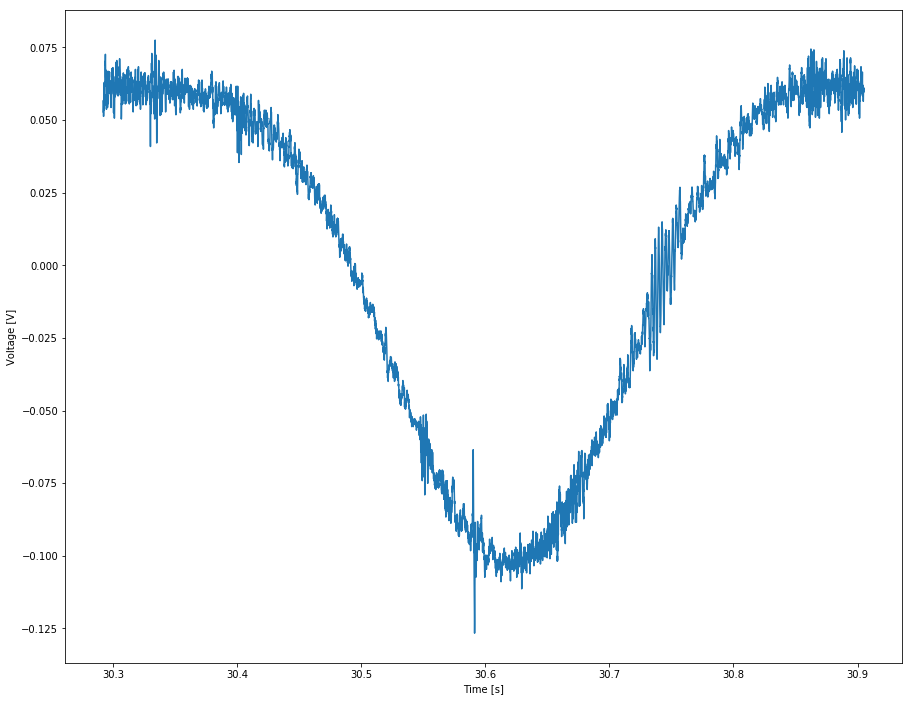

In [7]:
fig, ax = plt.subplots(figsize=(15,12))
ax.plot(t,p)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')

In [14]:
from skimage import util

p1=np.array(p,dtype=float)
p1.shape

(12367,)

In [15]:
slices = util.view_as_windows(p1, window_shape=(M,), step = 64)
print(f'Acceleration shape: {p1.shape}, Sliced Acceleration shape: {slices.shape}')

Acceleration shape: (12367,), Sliced Acceleration shape: (190, 256)


In [16]:
win = np.hanning(M + 1)[:-1]
slices = slices * win

In [17]:
slices = slices.T
print('Shape of `slices`:',slices.shape)

Shape of `slices`: (256, 190)


In [18]:
spectrum = np.fft.fft(slices, axis = 0)[:M // 2 +1:-1]
spectrum = np.abs(spectrum)

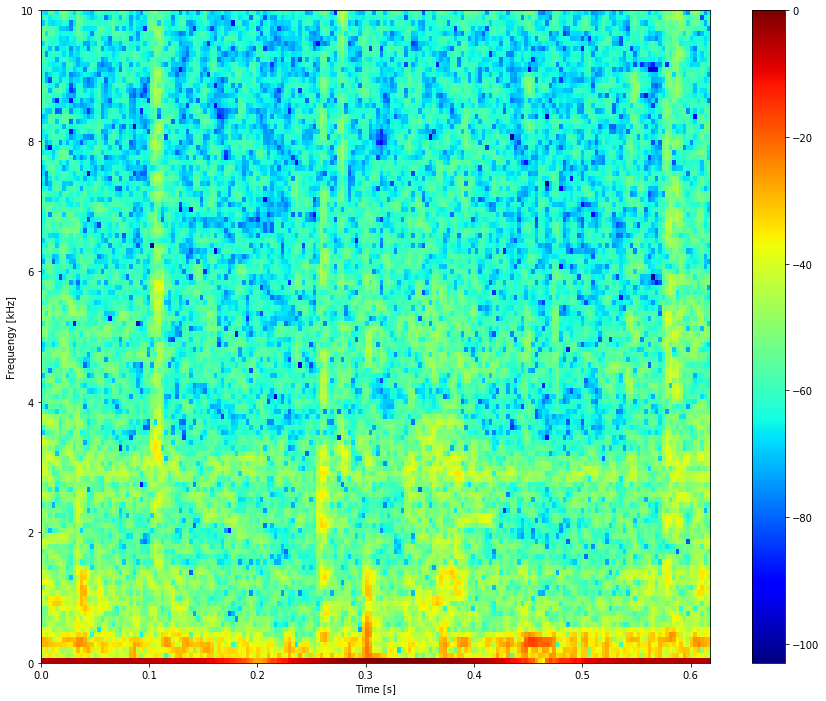

In [21]:
f, ax = plt.subplots(figsize=(15,12))

S = np.abs(spectrum)
S = 20*np.log10(S/np.max(S))

rate = 20000
N = p1.shape[0]
L = N / rate

im = ax.imshow(S, origin='lower', cmap=plt.cm.jet,extent=(0, L, 0, rate/2/1000 ))
ax.axis('tight')
ax.set_ylabel('Frequengy [kHz]')
ax.set_xlabel('Time [s]')
f.colorbar(im, ax=ax)